In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import folium

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

#import descartes
#import geopandas as gpd
#from Levenshtein import distance
from itertools import product
#from fuzzywuzzy import fuzz
#from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
#from shapely.geometry import Point, Polygon

#import geoplot
#from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

In [3]:
accidents_df = pd.read_csv('C:/Users/fkaramplias/OneDrive - Deloitte (O365D)/Desktop/archive.zip')

In [107]:
df = accidents_df.copy()

<AxesSubplot:>

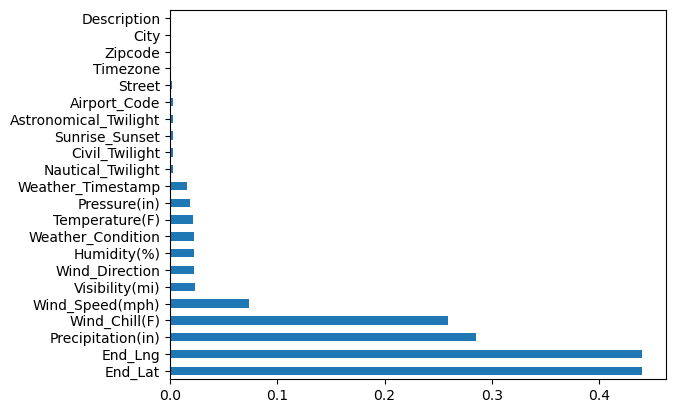

In [14]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [109]:
df.drop(columns = ['Source','End_Time','End_Lat','End_Lng','Description','Airport_Code','Timezone','Pressure(in)','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Distance(mi)       float64
 6   Street             object 
 7   City               object 
 8   County             object 
 9   State              object 
 10  Zipcode            object 
 11  Country            object 
 12  Weather_Timestamp  object 
 13  Temperature(F)     float64
 14  Wind_Chill(F)      float64
 15  Humidity(%)        float64
 16  Visibility(mi)     float64
 17  Wind_Direction     object 
 18  Wind_Speed(mph)    float64
 19  Precipitation(in)  float64
 20  Weather_Condition  object 
 21  Amenity            bool   
 22  Bump               bool   
 23  Crossing           bool   
 24  Give_Way           bool   
 25  Junction          

In [57]:
df.Start_Time = pd.to_datetime(df.Start_Time)

# Weather Analysis

## Temperature

In [248]:
temperature_stats = df.groupby('Temperature(F)').size().reset_index(name='TotalAccidents')
temperature_stats['Percentage'] = (temperature_stats['TotalAccidents'] / temperature_stats['TotalAccidents'].sum())

In [249]:
temperature_stats

,Temperature(F),TotalAccidents,Percentage
0,-89.0,10,1.321957e-06
1,-77.8,11,1.454153e-06
2,-58.0,1,1.321957e-07
3,-50.0,1,1.321957e-07
4,-45.0,1,1.321957e-07
...,...,...,...
855,174.0,2,2.643915e-07
856,189.0,1,1.321957e-07
857,196.0,5,6.609786e-07
858,203.0,1,1.321957e-07


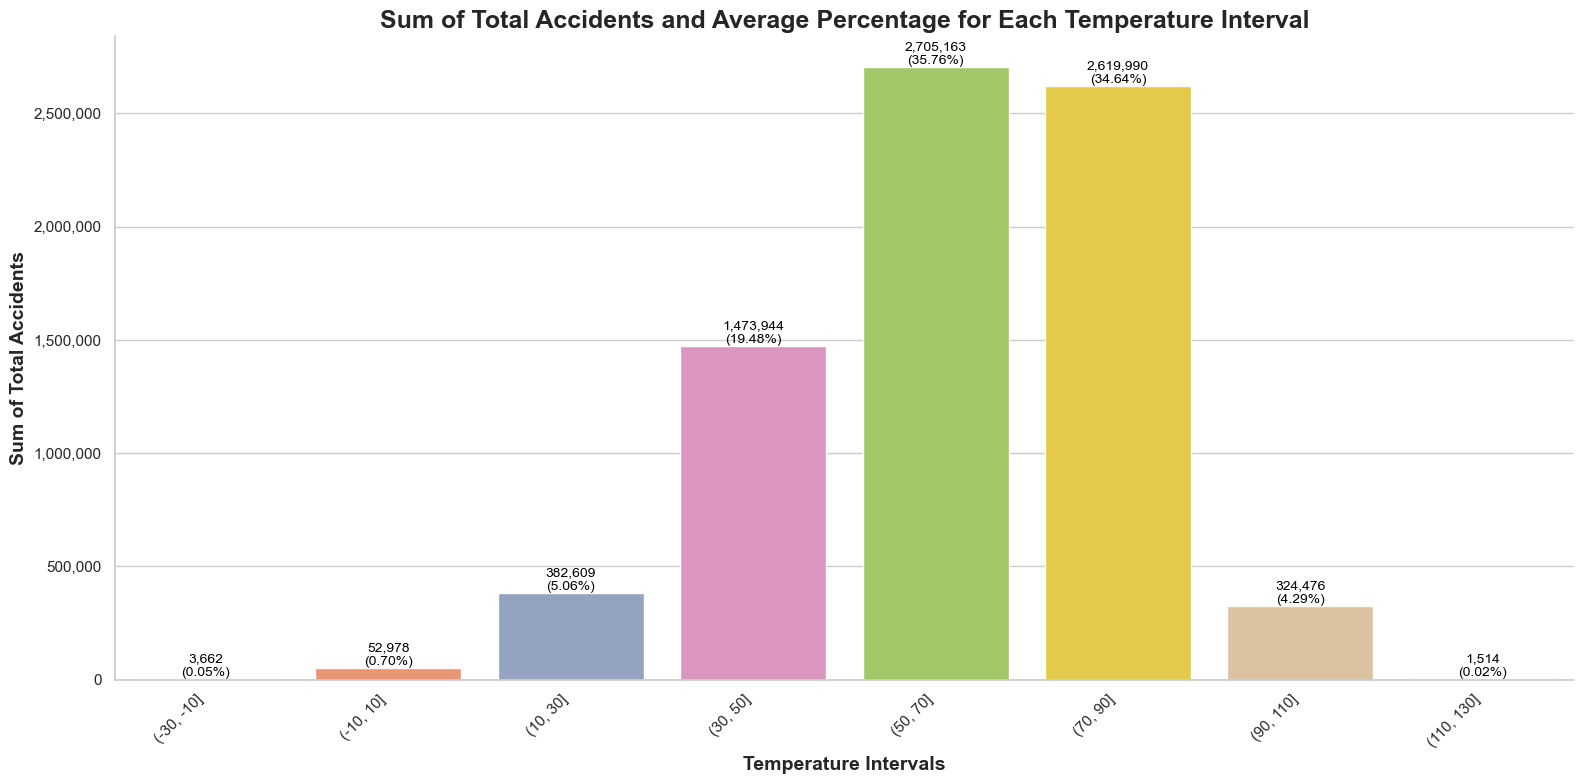

In [247]:
#accidents_by_interval = temperature_stats.groupby('TemperatureInterval').agg({'TotalAccidents': 'sum', 'Percentage': 'sum'}).reset_index()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming temperature_stats is your DataFrame
# Replace this with your actual DataFrame if the name is different

# Define temperature intervals
temperature_intervals = [-30, -10, 10, 30, 50, 70, 90, 110, 130]

# Create a new column with temperature intervals
temperature_stats['TemperatureInterval'] = pd.cut(
    temperature_stats['Temperature(F)'],
    bins=temperature_intervals,
    labels=[f'({i}, {j}]' for i, j in zip(temperature_intervals, temperature_intervals[1:])],
    right=False
)

# Group by the temperature intervals and calculate the sum of total accidents and average percentage
accidents_by_interval = temperature_stats.groupby('TemperatureInterval').agg({'TotalAccidents': 'sum', 'Percentage': 'sum'}).reset_index()

# Create a color palette with distinct colors for each bar
colors = sns.color_palette("Set2", len(accidents_by_interval))

# Plotting with Seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Add grid lines

# Use a barplot with error bars to show the uncertainty in each interval
ax = sns.barplot(x='TemperatureInterval', y='TotalAccidents', data=accidents_by_interval, palette=colors, ci='sd', capsize=0.1, errwidth=1.5)

# Adding total cases and percentage on each bar with formatted numbers
for i, (value, percent) in enumerate(zip(accidents_by_interval['TotalAccidents'], accidents_by_interval['Percentage'])):
    ax.text(i, value + 1, f'{value:,.0f}\n({percent:.2%})', ha='center', va='bottom', fontsize=10, color='black')  # Adjusted formatting

plt.xlabel('Temperature Intervals', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.ylabel('Sum of Total Accidents', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.title('Sum of Total Accidents and Average Percentage for Each Temperature Interval', fontsize=18, fontweight='bold')  # Adjust title font size and weight
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Formatting y-axis ticks in millions, thousands, etc.

# Add a legend if needed
# plt.legend(title='Legend', loc='upper right', labels=['Total Accidents', 'Average Percentage'])

plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove spines on the top and right sides for better aesthetics

plt.show()


### In the temperature range of 50(F) - 70(F), 35,76% of the road accidents occurred.

## Visibility

In [251]:
humidity_stats = df.groupby('Humidity(%)').size().reset_index(name='TotalAccidents')
humidity_stats['Percentage'] = (humidity_stats['TotalAccidents'] / humidity_stats['TotalAccidents'].sum())

In [252]:
humidity_stats

,Humidity(%),TotalAccidents,Percentage
0,1.0,49,0.000006
1,2.0,189,0.000025
2,3.0,670,0.000089
3,4.0,2167,0.000287
4,5.0,4113,0.000544
...,...,...,...
95,96.0,134809,0.017845
96,97.0,88156,0.011670
97,98.0,6977,0.000924
98,99.0,14262,0.001888


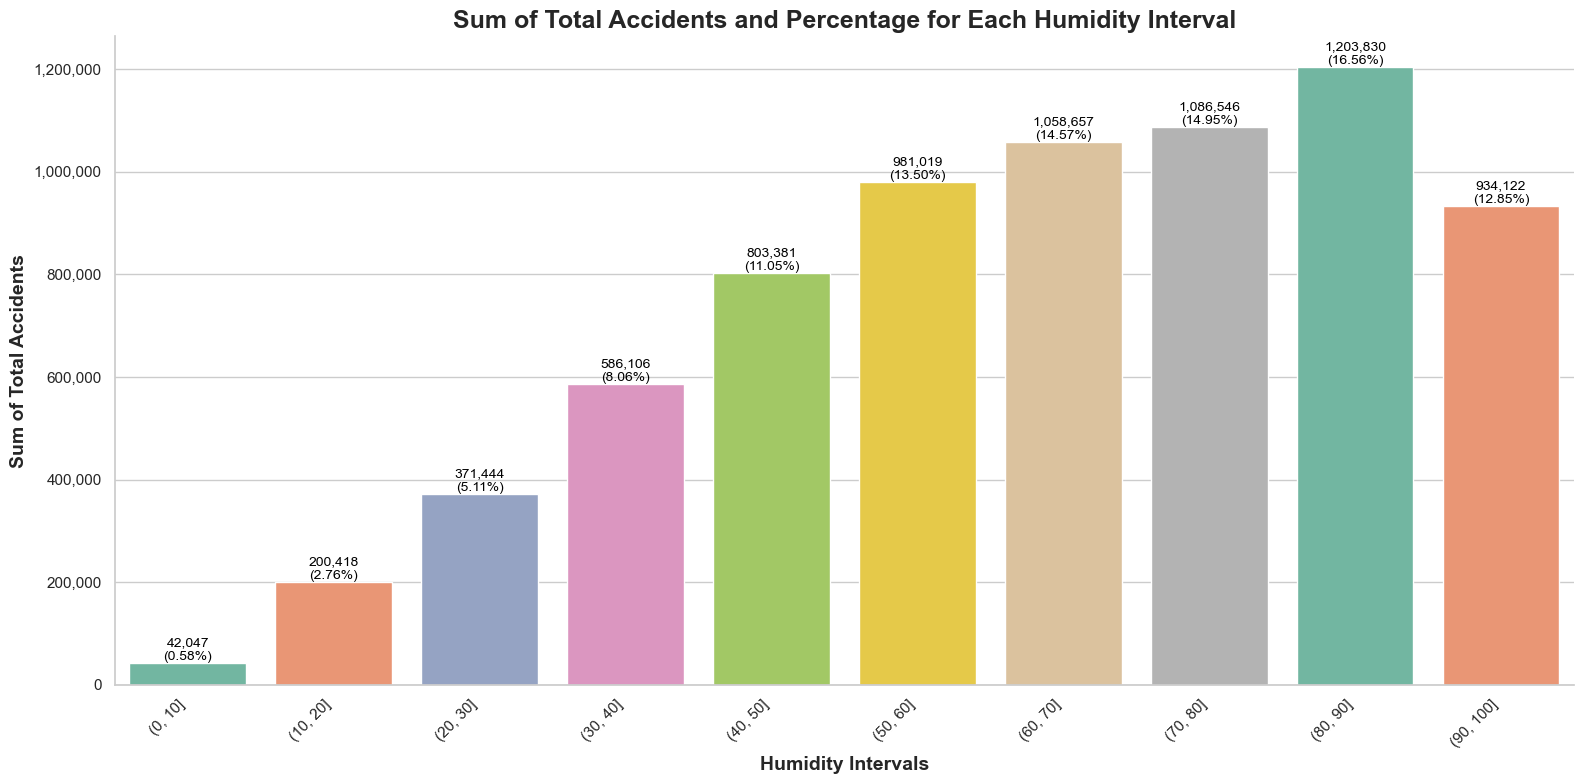

In [254]:
humidity_intervals = list(range(0, 101, 10))

# Create a new column with humidity intervals
humidity_stats['HumidityInterval'] = pd.cut(
    humidity_stats['Humidity(%)'],
    bins=humidity_intervals,
    labels=[f'({i}, {j}]' for i, j in zip(humidity_intervals, humidity_intervals[1:])],
    right=False
)

# Group by the humidity intervals and calculate the sum of total accidents
accidents_by_humidity_interval = humidity_stats.groupby('HumidityInterval')['TotalAccidents'].sum().reset_index()


# Calculate the percentage based on the total number of accidents
accidents_by_humidity_interval['Percentage'] = (accidents_by_humidity_interval['TotalAccidents'] / accidents_by_humidity_interval['TotalAccidents'].sum()) * 100

# Create a color palette with distinct colors for each bar
colors = sns.color_palette("Set2", len(accidents_by_humidity_interval))

# Plotting with Seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Add grid lines

# Use a barplot with error bars to show the uncertainty in each interval
ax = sns.barplot(x='HumidityInterval', y='TotalAccidents', data=accidents_by_humidity_interval, palette=colors, ci='sd', capsize=0.1, errwidth=1.5)

# Adding total cases and percentage on each bar with formatted numbers
for i, (value, percent) in enumerate(zip(accidents_by_humidity_interval['TotalAccidents'], accidents_by_humidity_interval['Percentage'])):
    ax.text(i, value + 1, f'{value:,.0f}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=10, color='black')  # Adjusted formatting

plt.xlabel('Humidity Intervals', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.ylabel('Sum of Total Accidents', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.title('Sum of Total Accidents and Percentage for Each Humidity Interval', fontsize=18, fontweight='bold')  # Adjust title font size and weight
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Formatting y-axis ticks in millions, thousands, etc.

# Add a legend if needed
# plt.legend(title='Legend', loc='upper right', labels=['Total Accidents', 'Percentage'])

plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove spines on the top and right sides for better aesthetics

plt.show()

### In the humidity range of 80(%) - 90(%), 16,56% of the road accidents occurred.

# Pressure

In [182]:
visibility_stats = df.groupby('Visibility(mi)').size().reset_index(name='TotalAccidents')
visibility_stats['Percentage'] = (visibility_stats['TotalAccidents'] / visibility_stats['TotalAccidents'].sum()) * 100

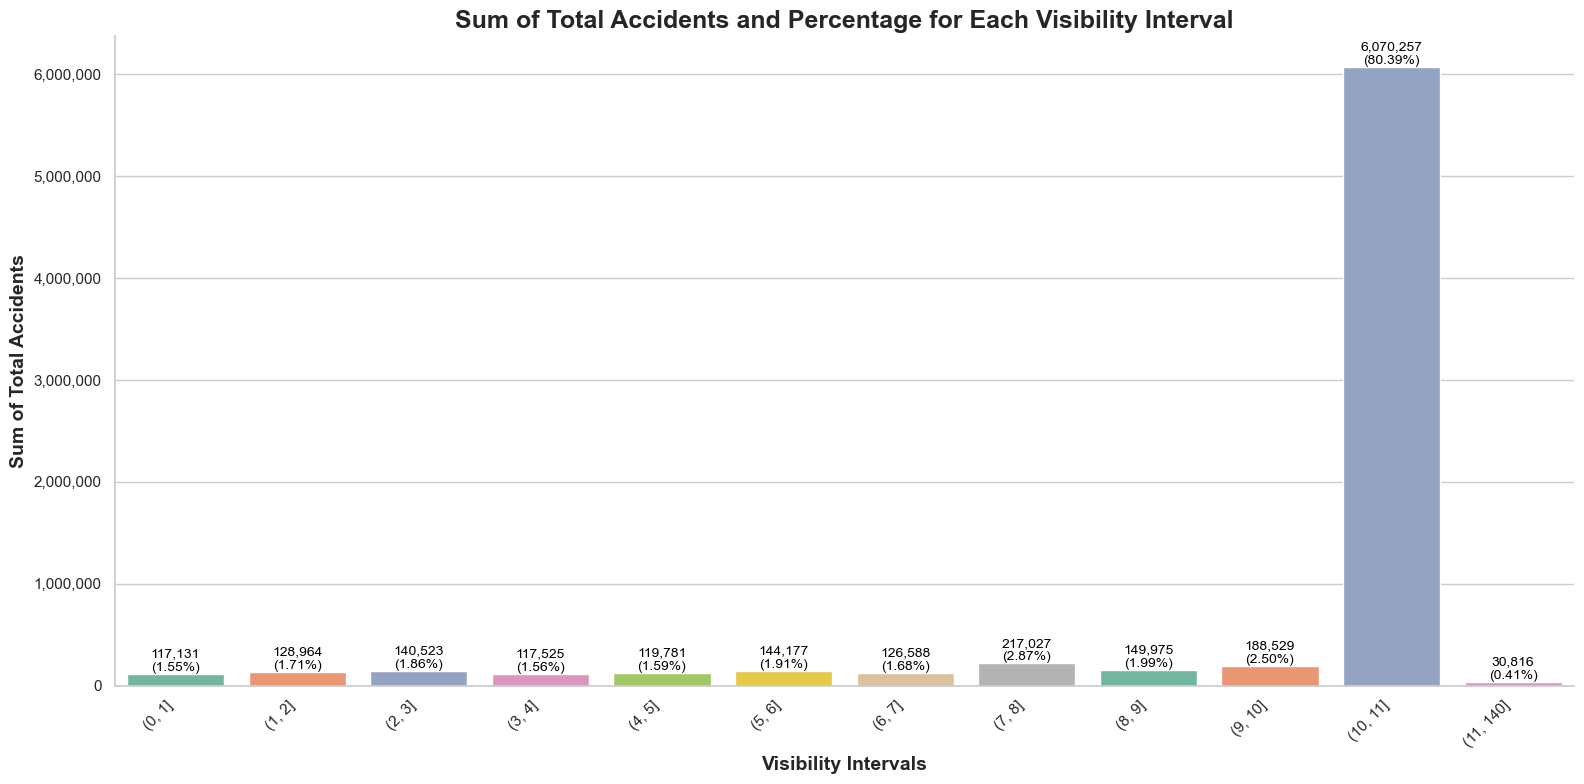

In [255]:
# Define custom visibility intervals
visibility_intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 140]

# Create a new column with visibility intervals
visibility_stats['VisibilityInterval'] = pd.cut(
    visibility_stats['Visibility(mi)'],
    bins=visibility_intervals,
    labels=[f'({i}, {j}]' for i, j in zip(visibility_intervals[:-1], visibility_intervals[1:])],
    right=False
)

# Group by the visibility intervals and calculate the sum of total accidents
accidents_by_visibility_interval = visibility_stats.groupby('VisibilityInterval')['TotalAccidents'].sum().reset_index()

# Calculate the percentage based on the total number of accidents
accidents_by_visibility_interval['Percentage'] = (accidents_by_visibility_interval['TotalAccidents'] / accidents_by_visibility_interval['TotalAccidents'].sum()) * 100

# Create a color palette with distinct colors for each bar
colors = sns.color_palette("Set2", len(accidents_by_visibility_interval))

# Plotting with Seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Add grid lines

# Use a barplot with error bars to show the uncertainty in each interval
ax = sns.barplot(x='VisibilityInterval', y='TotalAccidents', data=accidents_by_visibility_interval, palette=colors, ci='sd', capsize=0.1, errwidth=1.5)

# Adding total cases and percentage on each bar with formatted numbers
for i, (value, percent) in enumerate(zip(accidents_by_visibility_interval['TotalAccidents'], accidents_by_visibility_interval['Percentage'])):
    ax.text(i, value + 1, f'{value:,.0f}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=10, color='black')  # Adjusted formatting

plt.xlabel('Visibility Intervals', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.ylabel('Sum of Total Accidents', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.title('Sum of Total Accidents and Percentage for Each Visibility Interval', fontsize=18, fontweight='bold')  # Adjust title font size and weight
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Formatting y-axis ticks in millions, thousands, etc.

# Add a legend if needed
# plt.legend(title='Legend', loc='upper right', labels=['Total Accidents', 'Percentage'])

plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove spines on the top and right sides for better aesthetics

plt.show()

### In the visibility range of 10(mi) - 11(mi), 80,39% of the road accidents occurred.

# Wind Speed

In [191]:
wind_speed_stats = df.groupby('Wind_Speed(mph)').size().reset_index(name='TotalAccidents')
wind_speed_stats['Percentage'] = (wind_speed_stats['TotalAccidents'] / wind_speed_stats['TotalAccidents'].sum()) * 100

In [192]:
wind_speed_stats

,Wind_Speed(mph),TotalAccidents,Percentage
0,0.0,961643,13.436096
1,1.0,195,0.002725
2,1.2,445,0.006218
3,2.0,451,0.006301
4,2.3,906,0.012659
...,...,...,...
179,703.1,2,0.000028
180,812.0,1,0.000014
181,822.8,7,0.000098
182,984.0,1,0.000014


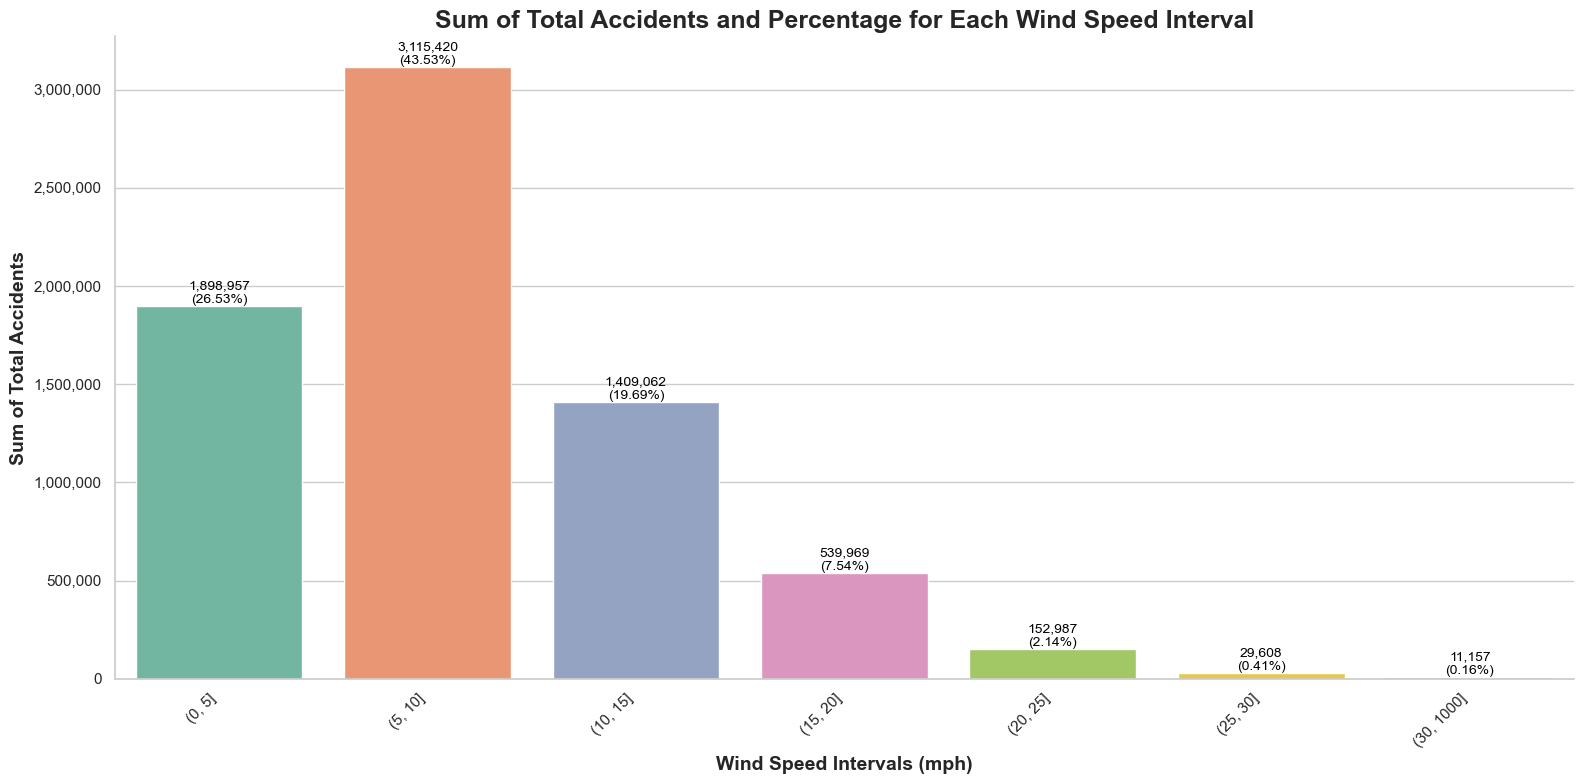

In [256]:
# Define custom wind speed intervals
wind_speed_intervals = [0, 5, 10, 15, 20, 25, 30, 1000]

# Create a new column with wind speed intervals
wind_speed_stats['WindSpeedInterval'] = pd.cut(
    wind_speed_stats['Wind_Speed(mph)'],
    bins=wind_speed_intervals,
    labels=[f'({i}, {j}]' for i, j in zip(wind_speed_intervals[:-1], wind_speed_intervals[1:])],
    right=False
)

# Group by the wind speed intervals and calculate the sum of total accidents
accidents_by_wind_speed_interval = wind_speed_stats.groupby('WindSpeedInterval')['TotalAccidents'].sum().reset_index()

# Calculate the percentage based on the total number of accidents
accidents_by_wind_speed_interval['Percentage'] = (accidents_by_wind_speed_interval['TotalAccidents'] / accidents_by_wind_speed_interval['TotalAccidents'].sum()) * 100

# Create a color palette with distinct colors for each bar
colors = sns.color_palette("Set2", len(accidents_by_wind_speed_interval))

# Plotting with Seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Add grid lines

# Use a barplot with error bars to show the uncertainty in each interval
ax = sns.barplot(x='WindSpeedInterval', y='TotalAccidents', data=accidents_by_wind_speed_interval, palette=colors, ci='sd', capsize=0.1, errwidth=1.5)

# Adding total cases and percentage on each bar with formatted numbers
for i, (value, percent) in enumerate(zip(accidents_by_wind_speed_interval['TotalAccidents'], accidents_by_wind_speed_interval['Percentage'])):
    ax.text(i, value + 1, f'{value:,.0f}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=10, color='black')  # Adjusted formatting

plt.xlabel('Wind Speed Intervals (mph)', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.ylabel('Sum of Total Accidents', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.title('Sum of Total Accidents and Percentage for Each Wind Speed Interval', fontsize=18, fontweight='bold')  # Adjust title font size and weight
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Formatting y-axis ticks in millions, thousands, etc.

# Add a legend if needed
# plt.legend(title='Legend', loc='upper right', labels=['Total Accidents', 'Percentage'])

plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove spines on the top and right sides for better aesthetics

plt.show()

### In the wind speed range of 5(mph) - 10(mph), 43,53% of the road accidents occurred.

# Wind Chill

In [257]:
wind_chill_stats = df.groupby('Wind_Chill(F)').size().reset_index(name='TotalAccidents')
wind_chill_stats['Percentage'] = (wind_chill_stats['TotalAccidents'] / wind_chill_stats['TotalAccidents'].sum())

In [258]:
wind_chill_stats

,Wind_Chill(F),TotalAccidents,Percentage
0,-89.0,10,1.745391e-06
1,-80.0,1,1.745391e-07
2,-69.0,1,1.745391e-07
3,-65.9,1,1.745391e-07
4,-63.0,7,1.221774e-06
...,...,...,...
996,172.0,2,3.490782e-07
997,174.0,2,3.490782e-07
998,189.0,1,1.745391e-07
999,196.0,5,8.726955e-07


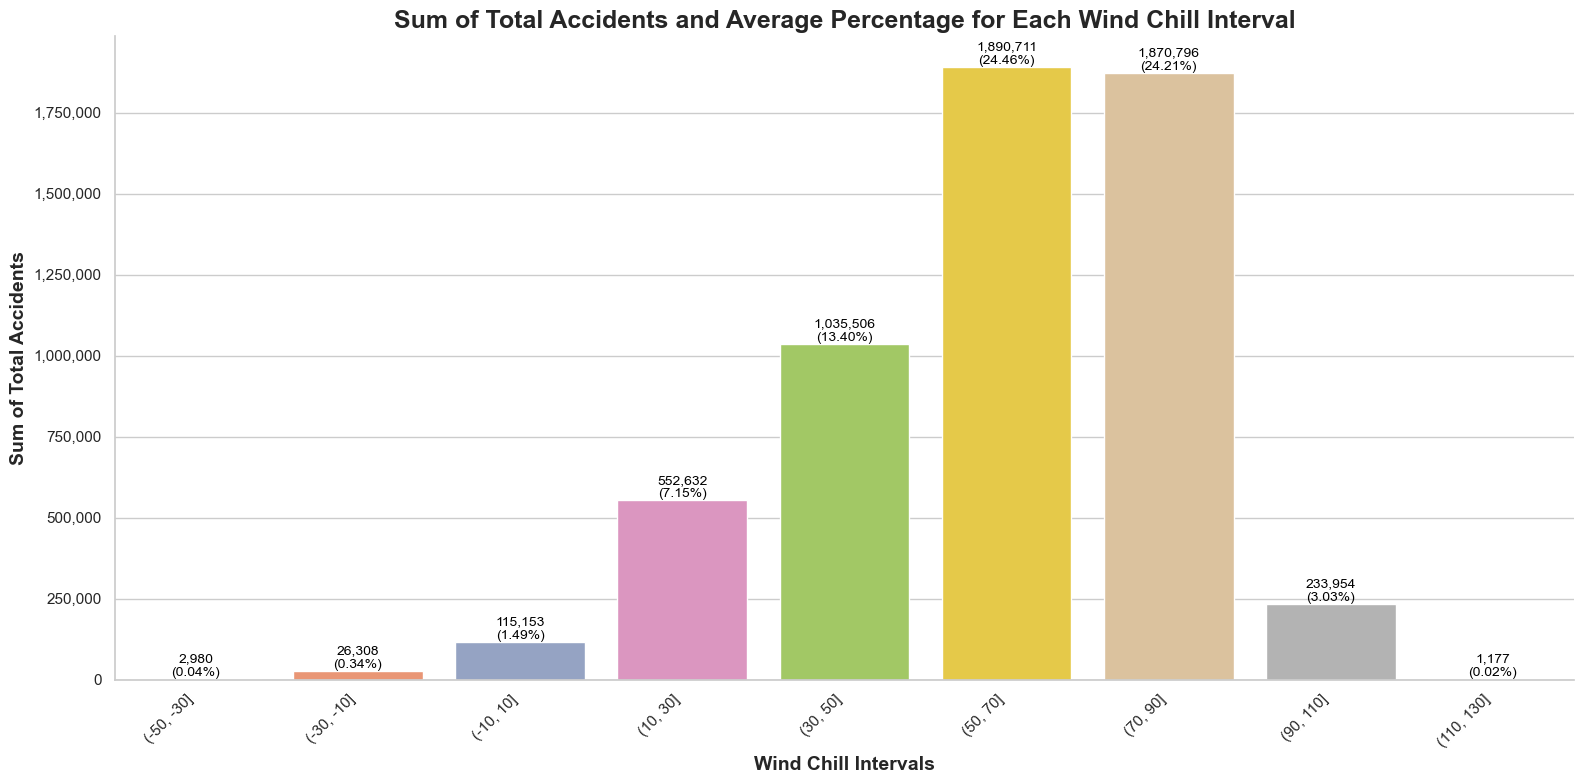

In [259]:
# Define wind chill intervals
wind_chill_intervals = [-50, -30, -10, 10, 30, 50, 70, 90, 110, 130]

# Create a new column with wind chill intervals
wind_chill_stats['WindChillInterval'] = pd.cut(
    wind_chill_stats['Wind_Chill(F)'],
    bins=wind_chill_intervals,
    labels=[f'({i}, {j}]' for i, j in zip(wind_chill_intervals, wind_chill_intervals[1:])],
    right=False
)

# Group by the wind chill intervals and calculate the sum of total accidents and average percentage
accidents_by_interval = wind_chill_stats.groupby('WindChillInterval').agg({'TotalAccidents': 'sum', 'Percentage': 'sum'}).reset_index()

# Calculate the percentage based on the total number of accidents
accidents_by_interval['Percentage'] = (accidents_by_interval['TotalAccidents'] / total_accidents) * 100

# Create a color palette with distinct colors for each bar
colors = sns.color_palette("Set2", len(accidents_by_interval))

# Plotting with Seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Add grid lines

# Use a barplot with error bars to show the uncertainty in each interval
ax = sns.barplot(x='WindChillInterval', y='TotalAccidents', data=accidents_by_interval, palette=colors, ci='sd', capsize=0.1, errwidth=1.5)

# Adding total cases and percentage on each bar with formatted numbers
for i, (value, percent) in enumerate(zip(accidents_by_interval['TotalAccidents'], accidents_by_interval['Percentage'])):
    ax.text(i, value + 1, f'{value:,.0f}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=10, color='black')  # Adjusted formatting

plt.xlabel('Wind Chill Intervals', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.ylabel('Sum of Total Accidents', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.title('Sum of Total Accidents and Average Percentage for Each Wind Chill Interval', fontsize=18, fontweight='bold')  # Adjust title font size and weight
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Formatting y-axis ticks in millions, thousands, etc.

# Add a legend if needed
# plt.legend(title='Legend', loc='upper right', labels=['Total Accidents', 'Average Percentage'])

plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove spines on the top and right sides for better aesthetics

plt.show()

### In the wind chill range of 50(F) - 70(F), 24,46% of the road accidents occurred.

# Weather Condition

In [196]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [197]:
# I keep the top 10 weather conditions
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

In [198]:
weather_condition_df

,Weather_Condition,Cases
0,Fair,2560802
1,Mostly Cloudy,1016195
2,Cloudy,817082
3,Clear,808743
4,Partly Cloudy,698972
5,Overcast,382866
6,Light Rain,352957
7,Scattered Clouds,204829
8,Light Snow,128680
9,Fog,99238


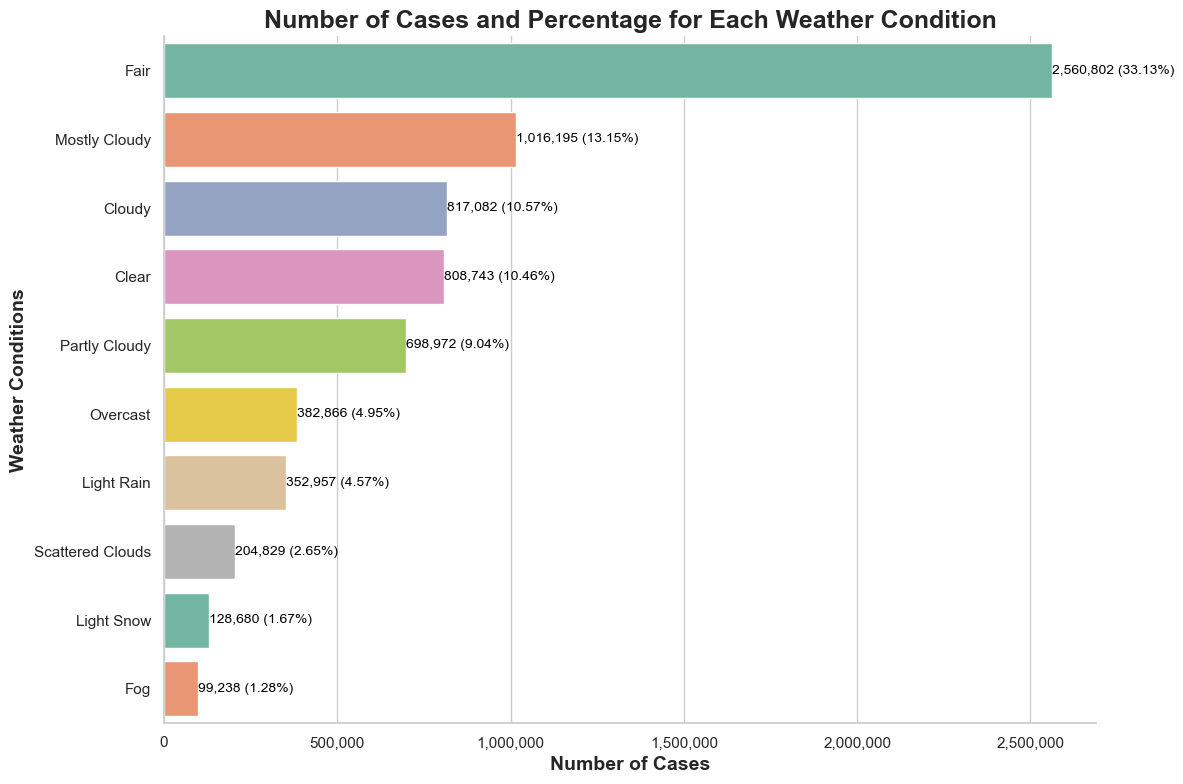

In [260]:
total_accidents = df['ID'].count()

# Calculate the percentage based on the total number of accidents
weather_condition_df['Percentage'] = (weather_condition_df['Cases'] / total_accidents) * 100

# Create a color palette with distinct colors for each bar
colors = sns.color_palette("Set2", len(weather_condition_df))

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Add grid lines

# Use a barplot to show the number of cases for each weather condition
ax = sns.barplot(x='Cases', y='Weather_Condition', data=weather_condition_df, palette=colors, orient='h')

# Adding text annotations for each bar with formatted numbers and percentages
for i, (value, percent) in enumerate(zip(weather_condition_df['Cases'], weather_condition_df['Percentage'])):
    ax.text(value, i, f'{value:,.0f} ({percent:.2f}%)', ha='left', va='center', fontsize=10, color='black')  # Adjusted formatting

plt.xlabel('Number of Cases', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.ylabel('Weather Conditions', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.title('Number of Cases and Percentage for Each Weather Condition', fontsize=18, fontweight='bold')  # Adjust title font size and weight

# Format x-axis ticks to display in non-scientific format
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove spines on the top and right sides for better aesthetics

plt.show()

### In fair conditions, 33,13% of the road accidents occurred.

# Percipitation

In [268]:
precipitation_stats = df.groupby('Precipitation(in)').size().reset_index(name='TotalAccidents')
precipitation_stats['Percentage'] = (precipitation_stats['TotalAccidents'] / precipitation_stats['TotalAccidents'].sum())*100

In [269]:
precipitation_stats

,Precipitation(in),TotalAccidents,Percentage
0,0.00,4991718,90.350977
1,0.01,151010,2.733308
2,0.02,74008,1.339558
3,0.03,50055,0.906004
4,0.04,37300,0.675137
...,...,...,...
294,10.80,1,0.000018
295,23.97,1,0.000018
296,24.00,4,0.000072
297,25.00,1,0.000018


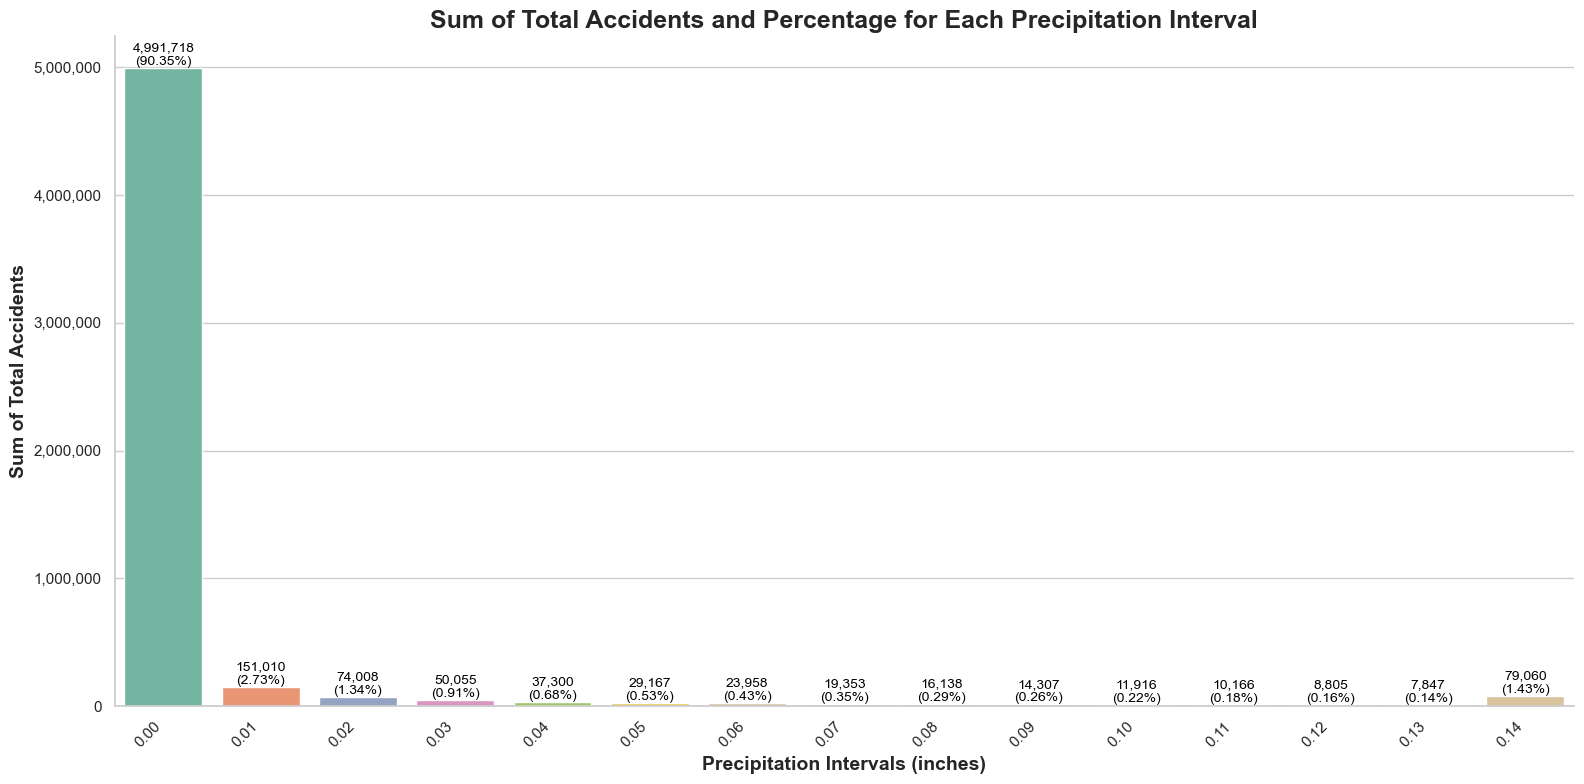

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming precipitation_stats is your DataFrame
# Replace this with your actual DataFrame if the name is different

# Define precipitation intervals
precipitation_intervals = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 37]

# Create a new column with precipitation intervals
precipitation_stats['PrecipitationInterval'] = pd.cut(
    precipitation_stats['Precipitation(in)'],
    bins=precipitation_intervals,
    labels=[f'{val:.2f}' for val in precipitation_intervals[:-1]],
    right=False
)

# Group by the precipitation intervals and calculate the sum of total accidents and percentage
accidents_by_interval_precipitation = precipitation_stats.groupby('PrecipitationInterval').agg({'TotalAccidents': 'sum', 'Percentage': 'sum'}).reset_index()

# Create a color palette with distinct colors for each bar
colors_precipitation = sns.color_palette("Set2", len(accidents_by_interval_precipitation))

# Plotting with Seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Add grid lines

# Use a barplot with error bars to show the uncertainty in each interval
ax_precipitation = sns.barplot(x='PrecipitationInterval', y='TotalAccidents', data=accidents_by_interval_precipitation, palette=colors_precipitation, ci='sd', capsize=0.1, errwidth=1.5)

# Adding total cases and percentage on each bar with formatted numbers
for i, (value, percent) in enumerate(zip(accidents_by_interval_precipitation['TotalAccidents'], accidents_by_interval_precipitation['Percentage'])):
    ax_precipitation.text(i, value + 1, f'{value:,.0f}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=10, color='black')  # Adjusted formatting

plt.xlabel('Precipitation Intervals (inches)', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.ylabel('Sum of Total Accidents', fontsize=14, fontweight='bold')  # Adjust label font size and weight
plt.title('Sum of Total Accidents and Percentage for Each Precipitation Interval', fontsize=18, fontweight='bold')  # Adjust title font size and weight
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax_precipitation.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Formatting y-axis ticks in millions, thousands, etc.

plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove spines on the top and right sides for better aesthetics

plt.show()


### "For 70% of the recorded accidents where precipitation information is available, it has been observed that approximately 90% of these accidents occurred under dry conditions with a precipitation value of 0.00"